In [1]:
# Download Dependecies
import pandas as pd
import requests
import pprint
import json


In [2]:
# Set variable for start data and end date for Data to be fetched
startDate = "2023-01-01"
endDate   = "2025-04-30"
# Download historical SOFR data from New York Fed (CSV)
# url = "https://markets.newyorkfed.org/api/rp/results/search.json?startDate=2025-01-01&endDate=2025-04-30&operationTypes=Reverse%20Repo&method=single&securityType=srf&term=overnight"

# url = "https://markets.newyorkfed.org/api/rp/results/search.json?startDate=2025-01-01&endDate=2025-04-30"
# Using the start Date and end Date, download data from the new york Fed web API
url = f"https://markets.newyorkfed.org/api/rp/results/search.json?startDate={startDate}&endDate={endDate}"
print(url)

https://markets.newyorkfed.org/api/rp/results/search.json?startDate=2023-01-01&endDate=2025-04-30


In [3]:
# using the request module fetch data from the API, and convert it to a json
response = requests.get(url)
response_json=response.json()
#check if the API is providing a success code of 200
print(response.status_code)


200


In [4]:
# check the length of them different elements of nested json
print(len(response_json))
print(len(response_json['repo']))
print(len(response_json['repo']['operations']))

# check the data type of the nested json 
print(type(response_json['repo']['operations']))

data_df= pd.DataFrame(response_json['repo']['operations'])

1
1
1184
<class 'list'>


In [5]:
# Peek into the structure of the pandas data frame and data type of different columns
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   operationId        1184 non-null   object 
 1   auctionStatus      1184 non-null   object 
 2   operationDate      1184 non-null   object 
 3   settlementDate     1184 non-null   object 
 4   maturityDate       1184 non-null   object 
 5   operationType      1184 non-null   object 
 6   operationMethod    1184 non-null   object 
 7   settlementType     1184 non-null   object 
 8   termCalenderDays   1184 non-null   int64  
 9   term               1184 non-null   object 
 10  releaseTime        1184 non-null   object 
 11  closeTime          1184 non-null   object 
 12  note               1184 non-null   object 
 13  lastUpdated        1184 non-null   object 
 14  participatingCpty  586 non-null    float64
 15  acceptedCpty       586 non-null    float64
 16  totalAmtSubmitted  1184 

In [6]:
#copy the data frame to a new df
Cleaned_df = data_df.copy()


In [7]:
# collect the datetime and time columns in separate list
date_col=  ["operationDate", "settlementDate", "maturityDate",  "lastUpdated"]
time_col = ["closeTime","releaseTime"]
# Apply the chages datetype to the cleaned_df data frame

# change the data type of datetime columns 
Cleaned_df[date_col] = Cleaned_df[date_col].apply(pd.to_datetime)

# Loop through and apply the change of new data type to the time related columns
for col in time_col:
    Cleaned_df[col] = Cleaned_df[col].apply(pd.to_datetime).dt.time
Cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   operationId        1184 non-null   object        
 1   auctionStatus      1184 non-null   object        
 2   operationDate      1184 non-null   datetime64[ns]
 3   settlementDate     1184 non-null   datetime64[ns]
 4   maturityDate       1184 non-null   datetime64[ns]
 5   operationType      1184 non-null   object        
 6   operationMethod    1184 non-null   object        
 7   settlementType     1184 non-null   object        
 8   termCalenderDays   1184 non-null   int64         
 9   term               1184 non-null   object        
 10  releaseTime        1184 non-null   object        
 11  closeTime          1184 non-null   object        
 12  note               1184 non-null   object        
 13  lastUpdated        1184 non-null   datetime64[ns]
 14  particip

In [8]:
# Sort the Data by operation Date and keeping the most recent date on top
Cleaned_df = Cleaned_df.sort_values(by=['operationDate'],ascending=False)
Cleaned_df

,operationId,auctionStatus,operationDate,settlementDate,maturityDate,operationType,operationMethod,settlementType,termCalenderDays,term,...,closeTime,note,lastUpdated,participatingCpty,acceptedCpty,totalAmtSubmitted,totalAmtAccepted,details,operationLimit,propositions
0,RP 043025 1,Results,2025-04-30,2025-04-30,2025-05-01,Reverse Repo,Fixed Rate,Same Day,1,Overnight,...,13:15:00,,2025-04-30 13:18:48,54.0,54.0,250601000000,250601000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",NaN,NaN
1,RP 043025 2,Results,2025-04-30,2025-04-30,2025-05-01,Repo,Multiple Price,Same Day,1,Overnight,...,13:45:00,,2025-04-30 13:45:59,NaN,NaN,110000000,110000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",5.000000e+11,NaN
2,RP 042925 1,Results,2025-04-29,2025-04-29,2025-04-30,Reverse Repo,Fixed Rate,Same Day,1,Overnight,...,13:15:00,,2025-04-29 13:15:32,37.0,37.0,157537000000,157537000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",NaN,NaN
3,RP 042925 2,Results,2025-04-29,2025-04-29,2025-04-30,Repo,Multiple Price,Same Day,1,Overnight,...,13:45:00,,2025-04-29 13:45:25,NaN,NaN,0,0,"[{'securityType': 'Treasury', 'amtSubmitted': ...",5.000000e+11,NaN
4,RP 042825 1,Results,2025-04-28,2025-04-28,2025-04-29,Reverse Repo,Fixed Rate,Same Day,1,Overnight,...,13:15:00,,2025-04-28 13:15:47,38.0,38.0,148649000000,148649000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,RP 010523 2,Results,2023-01-05,2023-01-05,2023-01-06,Repo,Multiple Price,Same Day,1,Overnight,...,13:45:00,,2023-01-05 13:45:25,NaN,NaN,0,0,"[{'securityType': 'Treasury', 'amtSubmitted': ...",5.000000e+11,NaN
1180,RP 010423 1,Results,2023-01-04,2023-01-04,2023-01-05,Reverse Repo,Fixed Rate,Same Day,1,Overnight,...,13:15:00,,2023-01-04 13:15:42,108.0,108.0,2229542000000,2229542000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",NaN,"[{'counterpartyType': 'bank', 'amtAccepted': 1..."
1181,RP 010423 2,Results,2023-01-04,2023-01-04,2023-01-05,Repo,Multiple Price,Same Day,1,Overnight,...,13:45:00,,2023-01-04 13:45:32,NaN,NaN,1000000,1000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",5.000000e+11,NaN
1182,RP 010323 1,Results,2023-01-03,2023-01-03,2023-01-04,Reverse Repo,Fixed Rate,Same Day,1,Overnight,...,13:15:00,,2023-01-03 13:15:47,99.0,99.0,2188272000000,2188272000000,"[{'securityType': 'Treasury', 'amtSubmitted': ...",NaN,"[{'counterpartyType': 'bank', 'amtAccepted': 0..."


In [9]:
# Copy the 'Cleaned_df' Dataframe to a new Dataframe 'reduced_cleaned_df'
reduced_cleaned_df  = Cleaned_df.copy(deep=True)

# Verify the columns in the data frame before dropping them
reduced_cleaned_df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 1184 entries, 0 to 1183
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   operationId        1184 non-null   object        
 1   auctionStatus      1184 non-null   object        
 2   operationDate      1184 non-null   datetime64[ns]
 3   settlementDate     1184 non-null   datetime64[ns]
 4   maturityDate       1184 non-null   datetime64[ns]
 5   operationType      1184 non-null   object        
 6   operationMethod    1184 non-null   object        
 7   settlementType     1184 non-null   object        
 8   termCalenderDays   1184 non-null   int64         
 9   term               1184 non-null   object        
 10  releaseTime        1184 non-null   object        
 11  closeTime          1184 non-null   object        
 12  note               1184 non-null   object        
 13  lastUpdated        1184 non-null   datetime64[ns]
 14  participating

In [10]:
# In the 'reduced_cleaned_df' drop the columns which are not required
reduced_cleaned_df = reduced_cleaned_df.drop(columns=['operationLimit','propositions','releaseTime','closeTime'])

#verify if the columns removed does not exist in the data frame
reduced_cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1184 entries, 0 to 1183
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   operationId        1184 non-null   object        
 1   auctionStatus      1184 non-null   object        
 2   operationDate      1184 non-null   datetime64[ns]
 3   settlementDate     1184 non-null   datetime64[ns]
 4   maturityDate       1184 non-null   datetime64[ns]
 5   operationType      1184 non-null   object        
 6   operationMethod    1184 non-null   object        
 7   settlementType     1184 non-null   object        
 8   termCalenderDays   1184 non-null   int64         
 9   term               1184 non-null   object        
 10  note               1184 non-null   object        
 11  lastUpdated        1184 non-null   datetime64[ns]
 12  participatingCpty  586 non-null    float64       
 13  acceptedCpty       586 non-null    float64       
 14  totalAmtSubmi

In [11]:
# Group by and count the different values exist in the "reduced_cleaned_df" data frame
reduced_cleaned_df['operationType'].value_counts()

operationType
Repo            598
Reverse Repo    586
Name: count, dtype: int64

In [12]:
# Create separate Data frames for Repo and Reverse Repo from the "reduced_cleaned_df" data frame
# "Repo_df" contains only the rows containing 'Repo' 
Repo_df = reduced_cleaned_df[reduced_cleaned_df['operationType']=='Repo']

# "Reverse_Repo_df" contains only the rows containing 'Reverse Repo' 
Reverse_Repo_df = reduced_cleaned_df[reduced_cleaned_df['operationType']=='Reverse Repo']
print(len(Repo_df))
print(len(Reverse_Repo_df))

598
586


In [13]:

#Set the operating date as index 
Repo_df.set_index("operationDate", inplace=True)
Repo_df.head(2)

,operationId,auctionStatus,settlementDate,maturityDate,operationType,operationMethod,settlementType,termCalenderDays,term,note,lastUpdated,participatingCpty,acceptedCpty,totalAmtSubmitted,totalAmtAccepted,details
operationDate,,,,,,,,,,,,,,,,
2025-04-30,RP 043025 2,Results,2025-04-30,2025-05-01,Repo,Multiple Price,Same Day,1,Overnight,,2025-04-30 13:45:59,NaN,NaN,110000000,110000000,"[{'securityType': 'Treasury', 'amtSubmitted': ..."
2025-04-29,RP 042925 2,Results,2025-04-29,2025-04-30,Repo,Multiple Price,Same Day,1,Overnight,,2025-04-29 13:45:25,NaN,NaN,0,0,"[{'securityType': 'Treasury', 'amtSubmitted': ..."


In [14]:
#Make the repo DF aggregated for Weekly and Monthly distribution


# Resample weekly (W) or monthly (M)
Repo_weekly_df = Repo_df[["totalAmtAccepted"]].resample("W").sum()

Repo_monthly_df = Repo_df[["totalAmtAccepted"]].resample("ME").sum()

#Remove all  index from the data frame

Repo_weekly_df = Repo_weekly_df.reset_index()
Repo_monthly_df = Repo_monthly_df.reset_index()

In [15]:
#Make the "Reverse_Repo_df" DF aggregated for Weekly and Monthly distribution

#Set the operating date as index 
Reverse_Repo_df.set_index("operationDate", inplace=True)

# Resample weekly (W) or monthly (M)
Reverse_Repo_weekly_df = Reverse_Repo_df["totalAmtAccepted"].resample("W").sum()
Reverse_Repo_monthly_df = Reverse_Repo_df["totalAmtAccepted"].resample("ME").sum()


#Remove all  index from the data frame
Reverse_Repo_weekly_df = Reverse_Repo_weekly_df.reset_index()
Reverse_Repo_monthly_df = Reverse_Repo_monthly_df.reset_index()

In [16]:
Reverse_Repo_monthly_df['totalAmtAccepted'] = (Reverse_Repo_monthly_df['totalAmtAccepted']/1e9).round(2)

In [17]:
Repo_monthly_df['totalAmtAccepted'] = (Repo_monthly_df['totalAmtAccepted']/1e6).round(2)

In [18]:
Repo_monthly_df.rename(columns={'totalAmtAccepted':'totalAmtAccepted(Million)'},inplace=True)
Repo_monthly_df

,operationDate,totalAmtAccepted(Million)
0,2023-01-31,16.0
1,2023-02-28,19.0
2,2023-03-31,85.0
3,2023-04-30,4.0
4,2023-05-31,183.0
5,2023-06-30,11.0
6,2023-07-31,43.0
7,2023-08-31,17.0
8,2023-09-30,46.0
9,2023-10-31,16.0


In [19]:
Reverse_Repo_monthly_df.rename(columns={'totalAmtAccepted':'totalAmtAccepted(Billion)'},inplace=True)
Reverse_Repo_monthly_df

,operationDate,totalAmtAccepted(Billion)
0,2023-01-31,42621.68
1,2023-02-28,39509.58
2,2023-03-31,50270.73
3,2023-04-30,43093.97
4,2023-05-31,49138.26
5,2023-06-30,43130.43
6,2023-07-31,35567.58
7,2023-08-31,40574.97
8,2023-09-30,29896.73
9,2023-10-31,24784.73


In [20]:
Repo_monthly_df

,operationDate,totalAmtAccepted(Million)
0,2023-01-31,16.0
1,2023-02-28,19.0
2,2023-03-31,85.0
3,2023-04-30,4.0
4,2023-05-31,183.0
5,2023-06-30,11.0
6,2023-07-31,43.0
7,2023-08-31,17.0
8,2023-09-30,46.0
9,2023-10-31,16.0


In [21]:
Reverse_Repo_monthly_df

,operationDate,totalAmtAccepted(Billion)
0,2023-01-31,42621.68
1,2023-02-28,39509.58
2,2023-03-31,50270.73
3,2023-04-30,43093.97
4,2023-05-31,49138.26
5,2023-06-30,43130.43
6,2023-07-31,35567.58
7,2023-08-31,40574.97
8,2023-09-30,29896.73
9,2023-10-31,24784.73


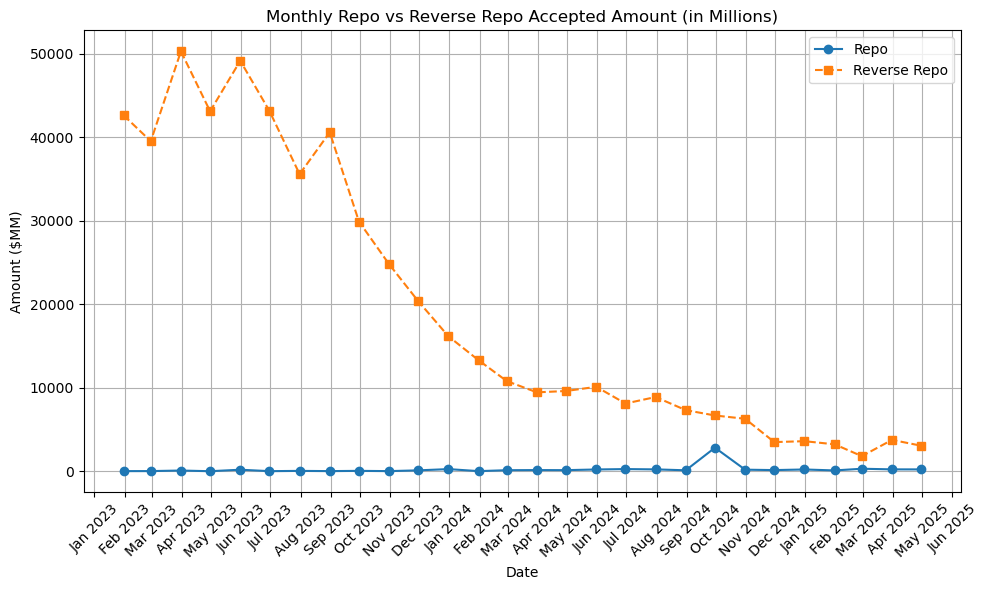

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot both Repo and Reverse Repo
plt.figure(figsize=(10, 6))

# Plot Repo
plt.plot(
    Repo_monthly_df['operationDate'],
    Repo_monthly_df['totalAmtAccepted(Million)'],
    marker='o',
    label='Repo'
)

# Plot Reverse Repo
plt.plot(
    Reverse_Repo_monthly_df['operationDate'],
    Reverse_Repo_monthly_df['totalAmtAccepted(Billion)'],
    marker='s',
    linestyle='--',
    label='Reverse Repo'
)

# Format x-axis to show fewer ticks (e.g., every 2nd month)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # every 2 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.title('Monthly Repo vs Reverse Repo Accepted Amount (in Millions)')
plt.xlabel('Date')
plt.ylabel('Amount ($MM)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
Repo_monthly_df

,operationDate,totalAmtAccepted(Million)
0,2023-01-31,16.0
1,2023-02-28,19.0
2,2023-03-31,85.0
3,2023-04-30,4.0
4,2023-05-31,183.0
5,2023-06-30,11.0
6,2023-07-31,43.0
7,2023-08-31,17.0
8,2023-09-30,46.0
9,2023-10-31,16.0


In [24]:
Reverse_Repo_monthly_df

,operationDate,totalAmtAccepted(Billion)
0,2023-01-31,42621.68
1,2023-02-28,39509.58
2,2023-03-31,50270.73
3,2023-04-30,43093.97
4,2023-05-31,49138.26
5,2023-06-30,43130.43
6,2023-07-31,35567.58
7,2023-08-31,40574.97
8,2023-09-30,29896.73
9,2023-10-31,24784.73


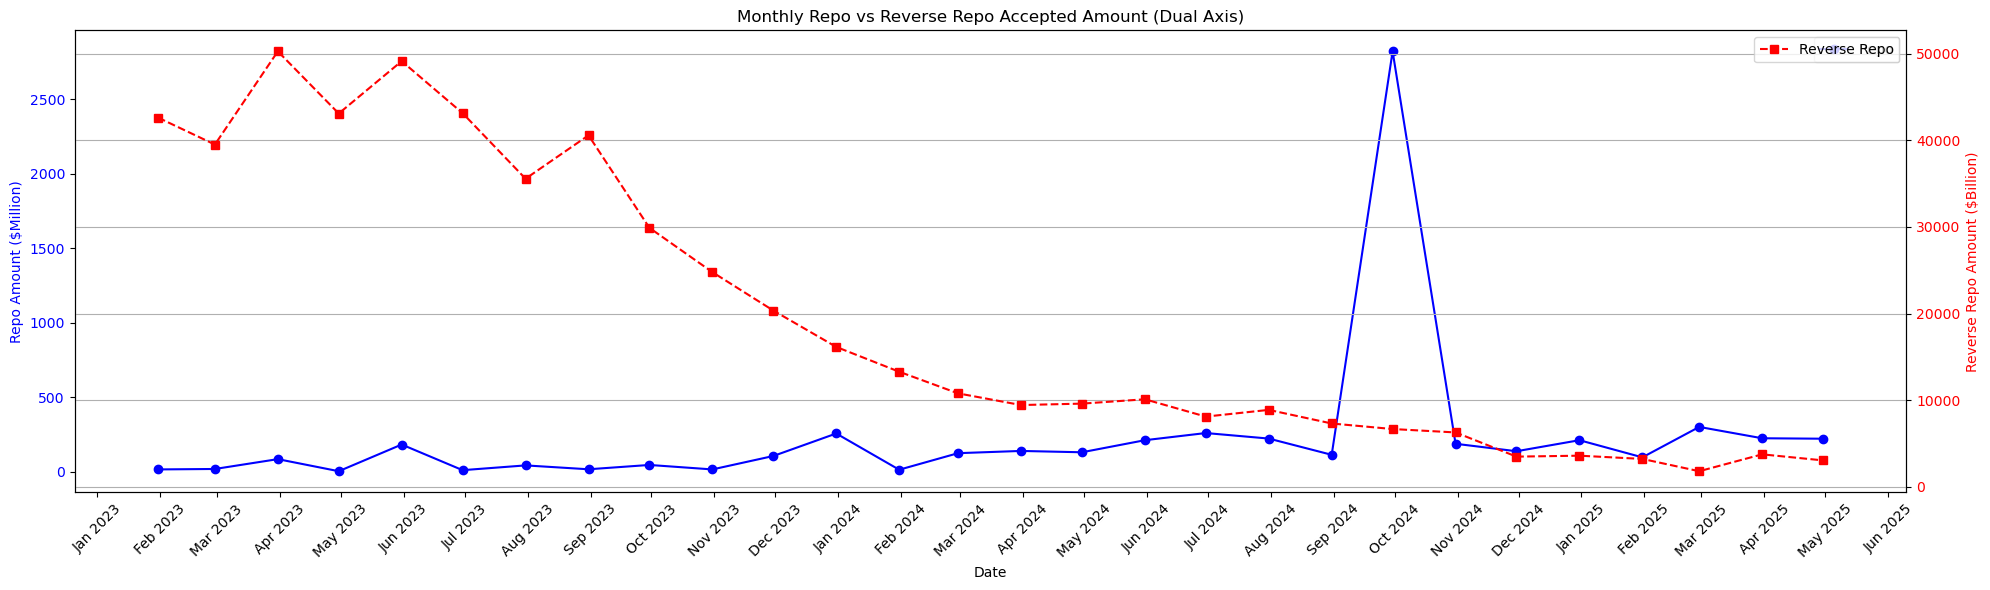

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure dates are datetime
Repo_monthly_df['operationDate'] = pd.to_datetime(Repo_monthly_df['operationDate'])
Reverse_Repo_monthly_df['operationDate'] = pd.to_datetime(Reverse_Repo_monthly_df['operationDate'])

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot Repo on left y-axis
ax1.plot(
    Repo_monthly_df['operationDate'],
    Repo_monthly_df['totalAmtAccepted(Million)'],
    color='blue',
    marker='o',
    label='Repo'
)
ax1.set_ylabel('Repo Amount ($Million)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format x-axis (optional: reduce tick clutter)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.set_xlabel('Date')
plt.xticks(rotation=45)
plt.legend()

# Create second y-axis (right)
ax2 = ax1.twinx()

# Plot Reverse Repo on right y-axis
ax2.plot(
    Reverse_Repo_monthly_df['operationDate'],
    Reverse_Repo_monthly_df['totalAmtAccepted(Billion)'],
    color='red',
    marker='s',
    linestyle='--',
    label='Reverse Repo'
)
ax2.set_ylabel('Reverse Repo Amount ($Billion)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout
plt.title('Monthly Repo vs Reverse Repo Accepted Amount (Dual Axis)')
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

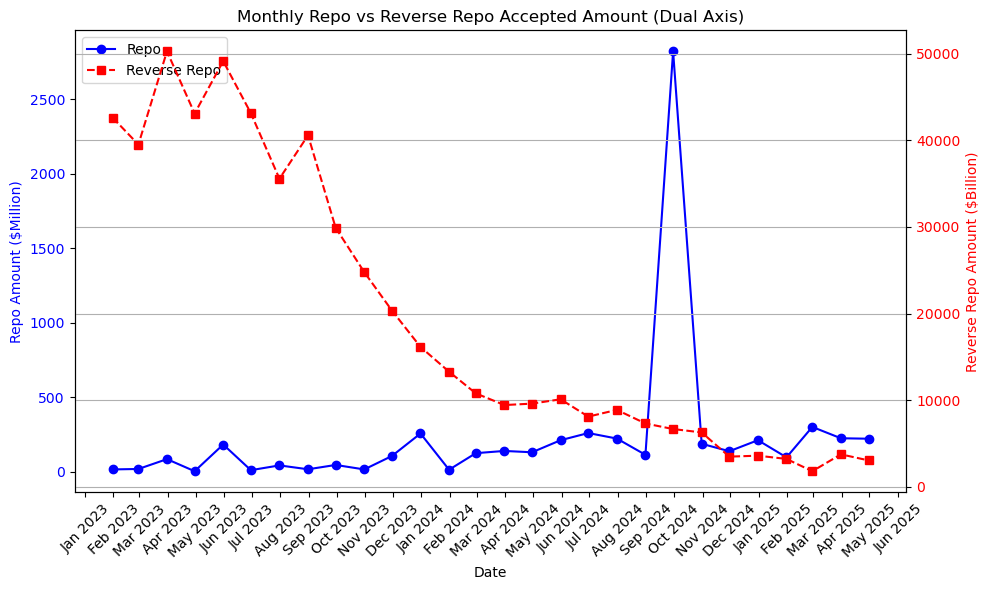

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure datetime conversion
Repo_monthly_df['operationDate'] = pd.to_datetime(Repo_monthly_df['operationDate'])
Reverse_Repo_monthly_df['operationDate'] = pd.to_datetime(Reverse_Repo_monthly_df['operationDate'])

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Repo on left y-axis
repo_line, = ax1.plot(
    Repo_monthly_df['operationDate'],
    Repo_monthly_df['totalAmtAccepted(Million)'],
    color='blue',
    marker='o',
    label='Repo'
)
ax1.set_ylabel('Repo Amount ($Million)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Format x-axis
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.set_xlabel('Date')
plt.xticks(rotation=45)

# Create second y-axis (right)
ax2 = ax1.twinx()

# Plot Reverse Repo on right y-axis
reverse_line, = ax2.plot(
    Reverse_Repo_monthly_df['operationDate'],
    Reverse_Repo_monthly_df['totalAmtAccepted(Billion)'],
    color='red',
    marker='s',
    linestyle='--',
    label='Reverse Repo'
)
ax2.set_ylabel('Reverse Repo Amount ($Billion)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends from both axes
lines = [repo_line, reverse_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Final formatting
plt.title('Monthly Repo vs Reverse Repo Accepted Amount (Dual Axis)')
plt.grid(True)
plt.tight_layout()
plt.show()